# Sales data analysis

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('superstore_sales.xlsx')
df.head(5)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


#### Checking for Nan values in the data set

In [4]:
df[df.isnull().any(axis=1)]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year


## Exploratory Data Analysis

### 1. What is the overall sales trend?

In [81]:
df['order_date'] = pd.to_datetime(df['order_date']) 
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))
df


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011,2011-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014,2014-12
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014,2014-12
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014,2014-12
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014,2014-12


In [6]:
trend  = df.groupby('month_year').sum()['sales'].reset_index()
trend


,month_year,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610
5,2011-06,215207.38022
6,2011-07,115510.41912
7,2011-08,207581.49122
8,2011-09,290214.45534
9,2011-10,199071.26404


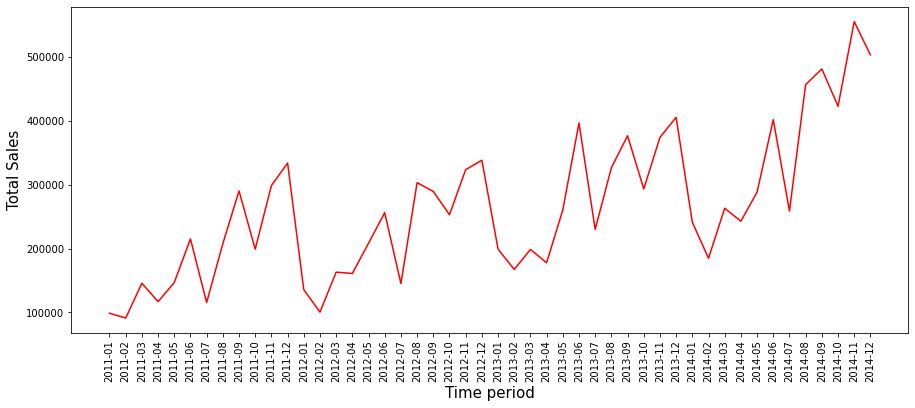

In [7]:
plt.figure(figsize=(15,6))
plt.plot(trend['month_year'], trend['sales'], color = 'r')
plt.xticks(rotation=90)
plt.xlabel('Time period',size=15)
plt.ylabel('Total Sales',size=15)
plt.show()

### 2. What are the top 10 products by sale? 

In [37]:
top = pd.DataFrame(df.groupby('product_name').sum()['sales']).reset_index()
top.sort_values('sales', ascending = False, inplace = True)
top1 = top.head(10)
top1

,product_name,sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160
2988,"Samsung Smart Phone, Cordless",48653.4600
2502,"Nokia Smart Phone, with Caller ID",47877.7857


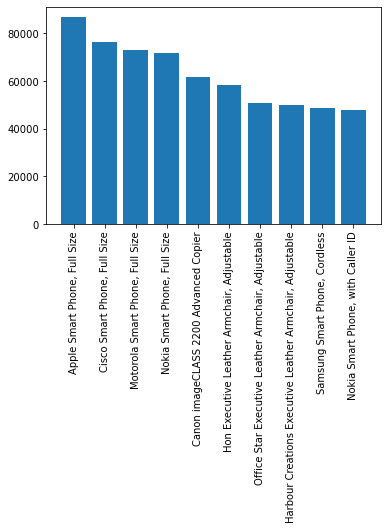

In [86]:
plt.bar(top1['product_name'], top1['sales'])
plt.xticks(rotation=90)
plt.show()

### 3. What are the most selling products?

In [35]:
sell_df = pd.DataFrame(df.groupby('product_name').sum()['quantity']).reset_index()
sell_df.sort_values('quantity', ascending=False, inplace=True)
sell1 = sell_df.head(10)
sell1

,product_name,quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
3335,"Stockwell Paper Clips, Assorted Sizes",253
446,"Avery Index Tab, Clear",252
1981,"Ibico Index Tab, Clear",251
3179,"Smead File Cart, Single Width",250
3266,"Stanley Pencil Sharpener, Water Color",242


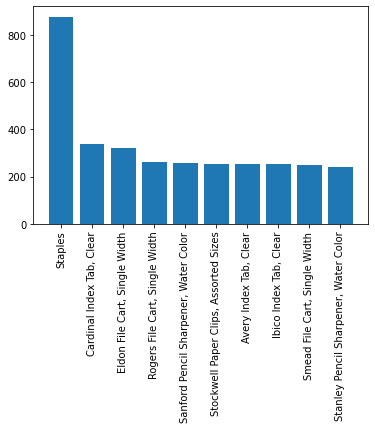

In [36]:
plt.bar(sell1['product_name'], sell1['quantity'])
plt.xticks(rotation =90)
plt.show()

### 4. Which is the most preffered ship mode?

In [51]:
df.groupby(['ship_mode']).count().sort_values(by='ship_mode' ,ascending=False)['order_id']

ship_mode
Standard Class    30775
Second Class      10309
Same Day           2701
First Class        7505
Name: order_id, dtype: int64

C:\Users\vinee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


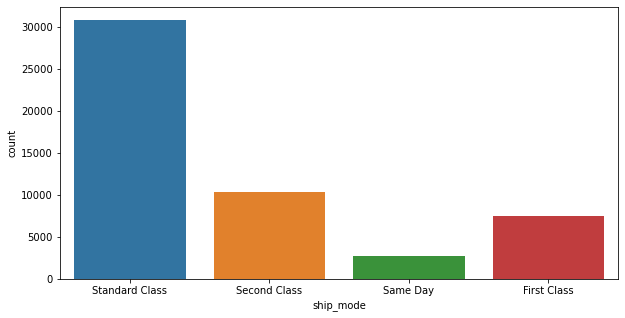

In [66]:
import seaborn as sns 
plt.figure(figsize=(10,5))
sns.countplot(df['ship_mode'])
plt.show()

### 5. Which are the most profitable catogory and sub-category?

In [77]:
profit = pd.DataFrame(df.groupby(['category','sub_category']).sum()['profit'])
profit.sort_values(['category','profit'], ascending =False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870